<a href="https://colab.research.google.com/github/ayushkumar-5/anyt/blob/main/mini_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!ls -lh "/content/drive/MyDrive/iq classification"


total 384M
-rw------- 1 root root  977K Dec  5  2019 CortexSubcortex_ColeAnticevic_NetPartition_wSubcorGSR_netassignments_LR.dlabel.nii
-rw------- 1 root root 1008K Aug  7  2019 Gordon333.32k_fs_LR.dlabel.nii
-rw------- 1 root root   31M Aug  7  2019 HCP_S1200_997_tfMRI_ALLTASKS_level2_cohensd_hp200_s2_MSMAll.dscalar.nii
-rw------- 1 root root   31M Aug  7  2019 HCP_S1200_997_tfMRI_ALLTASKS_level2_cohensd_hp200_s2_MSMSulc.dscalar.nii
-rw------- 1 root root   31M Aug  7  2019 HCP_S1200_997_tfMRI_ALLTASKS_level2_cohensd_hp200_s4_MSMAll.dscalar.nii
-rw------- 1 root root   31M Aug  7  2019 HCP_S1200_997_tfMRI_ALLTASKS_level2_cohensd_hp200_s4_MSMSulc.dscalar.nii
-rw------- 1 root root   21M Dec 10  2019 HCP_S1200_GroupAvg_BALSA.scene
-rw------- 1 root root  3.4M Oct 23 15:23 HCP_YA_subjects_2025_10_23_20_53_20.csv
-rw------- 1 root root  3.4M Oct 23 15:23 HCP_YA_subjects_2025_10_23_20_53_21.csv
-rw------- 1 root root  630K Aug  7  2019 Human.Brodmann09.32k_fs_LR.dlabel.nii
-rw------- 1 roo

In [30]:
from google.colab import drive
import pandas as pd

# Mount Drive
drive.mount('/content/drive')

# Load the CSV (choose one)
data_path = '/content/drive/MyDrive/iq classification/HCP_YA_subjects_2025_10_23_20_53_20.csv'
df = pd.read_csv(data_path)

print(df.shape)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1206, 584)


,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,5.2,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88


In [31]:
# Drop non-numeric columns for simplicity
X = df.select_dtypes(include=['float64', 'int64'])

# Choose target
target = 'Mars_Log_Score'  # replace if you want another IQ proxy
y = X.pop(target)

# Fill missing values
X = X.fillna(X.median())
y = y.fillna(y.median())

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (1206, 457)
Target shape: (1206,)


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 20 components
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio (20 components):", sum(pca.explained_variance_ratio_))


Explained variance ratio (20 components): 0.5020381886495742


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 0.15429249565314593


In [36]:
y_train_scaled = (y_train - y_train.mean()) / y_train.std()
y_test_scaled = (y_test - y_train.mean()) / y_train.std()


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


R2 Score: -4.21280406350017
RMSE: 0.1304277134872879


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset shape: (1206, 584)
Features shape: (1206, 457)
Target shape: (1206,)
Explained variance ratio by 20 components: 0.5020239889603537
Linear Regression R2: -0.008537169824310187
Linear Regression RMSE: 8.949756991636443
Random Forest R2: -0.0356396628452571
Random Forest RMSE: 9.069213507780624


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP R2: -2.2642721570808173
MLP RMSE: 16.101208327143382
Top 10 features contributing to PCA Component 1:
 FS_BrainSeg_Vol                          0.121490
FS_BrainSeg_Vol_No_Vent_Surf             0.121327
FS_BrainSeg_Vol_No_Vent                  0.121323
FS_Total_GM_Vol                          0.121156
FS_SupraTentorial_Vol                    0.120957
FS_SupraTentorial_Vol_No_Vent            0.120776
FS_SupraTentorial_No_Vent_Voxel_Count    0.120769
FS_TotCort_GM_Vol                        0.119815
FS_RCort_GM_Vol                          0.119610
FS_Mask_Vol                              0.119158
Name: 0, dtype: float64


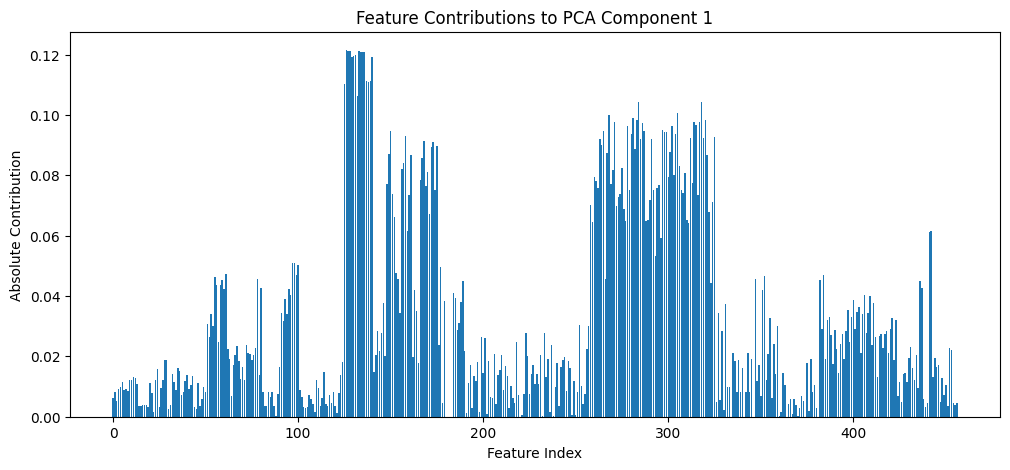

In [38]:
# ===============================
# 1️⃣ Mount Drive and Load CSV
# ===============================
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/iq classification/HCP_YA_subjects_2025_10_23_20_53_20.csv'
df = pd.read_csv(data_path)

print("Dataset shape:", df.shape)
df.head()

# ===============================
# 2️⃣ Preprocess Data
# ===============================

# Drop non-numeric columns
X = df.select_dtypes(include=['float64', 'int64'])

# Choose target with wider range
target = 'Odor_Unadj'
y = X.pop(target)

# Fill missing values
X = X.fillna(X.median())
y = y.fillna(y.median())

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# ===============================
# 3️⃣ Scale Features and PCA
# ===============================
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 20 principal components
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio by 20 components:", sum(pca.explained_variance_ratio_))

# ===============================
# 4️⃣ Train/Test Split
# ===============================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# ===============================
# 5️⃣ Train Models
# ===============================

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# --- Random Forest ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# --- MLP Regressor ---
mlp = MLPRegressor(hidden_layer_sizes=(64,32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("MLP R2:", r2_score(y_test, y_pred_mlp))
print("MLP RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_mlp)))

# ===============================
# 6️⃣ PCA Feature Contributions
# ===============================
import matplotlib.pyplot as plt

# PCA loadings: how each original feature contributes to components
loadings = pd.DataFrame(pca.components_.T, index=X.columns)

# Top 10 features contributing to the first component
top_features = loadings[0].abs().sort_values(ascending=False).head(10)
print("Top 10 features contributing to PCA Component 1:\n", top_features)

# Optional: Plot contributions
plt.figure(figsize=(12,5))
plt.bar(range(len(loadings)), loadings[0].abs())
plt.title("Feature Contributions to PCA Component 1")
plt.xlabel("Feature Index")
plt.ylabel("Absolute Contribution")
plt.show()


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [40]:
# Replace with your actual CSV path
df = pd.read_csv("HCP_YA_subjects_2025_10_23_20_53_20.csv")

# Quick look
print(df.head())
print(df.info())


   Subject Release Acquisition Gender    Age  3T_Full_MR_Compl  T1_Count  \
0   100004    S900         Q06      M  22-25             False         0   
1   100206    S900         Q11      M  26-30              True         1   
2   100307      Q1         Q01      F  26-30              True         1   
3   100408      Q3         Q03      M  31-35              True         1   
4   100610    S900         Q08      M  26-30              True         2   

   T2_Count  3T_RS-fMRI_Count  3T_RS-fMRI_PctCompl  ...  Noise_Comp  \
0         0                 0                  0.0  ...         5.2   
1         1                 4                100.0  ...         6.0   
2         1                 4                100.0  ...         3.6   
3         1                 4                100.0  ...         2.0   
4         1                 4                100.0  ...         2.0   

   Odor_Unadj  Odor_AgeAdj  PainIntens_RawScore  PainInterf_Tscore  \
0      101.12        86.45                  2.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [43]:
pca = PCA(n_components=0.95, svd_solver='full')  # keep 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original features:", X_train.shape[1])
print("Reduced features after PCA:", X_train_pca.shape[1])


Original features: 457
Reduced features after PCA: 206


In [ ]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='r2'
)

grid_search.fit(X_train_pca, y_train)
print("Best Params:", grid_search.best_params_)


In [45]:
y_pred = grid_search.predict(X_test_pca)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R2 Score: {r2:.3f}")


Test MSE: 60.400
Test R2 Score: 0.239


In [48]:
[col for col in df.columns if 'Cog' in col or 'PMAT' in col or 'IQ' in col]


['PMAT_Compl',
 'PMAT24_A_CR',
 'PMAT24_A_SI',
 'PMAT24_A_RTCR',
 'CogFluidComp_Unadj',
 'CogFluidComp_AgeAdj',
 'CogEarlyComp_Unadj',
 'CogEarlyComp_AgeAdj',
 'CogTotalComp_Unadj',
 'CogTotalComp_AgeAdj',
 'CogCrystalComp_Unadj',
 'CogCrystalComp_AgeAdj']

Fitting 3 folds for each of 36 candidates, totalling 108 fits
✅ Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
📉 Test MSE: 135.054
📈 Test R2 Score: 0.710


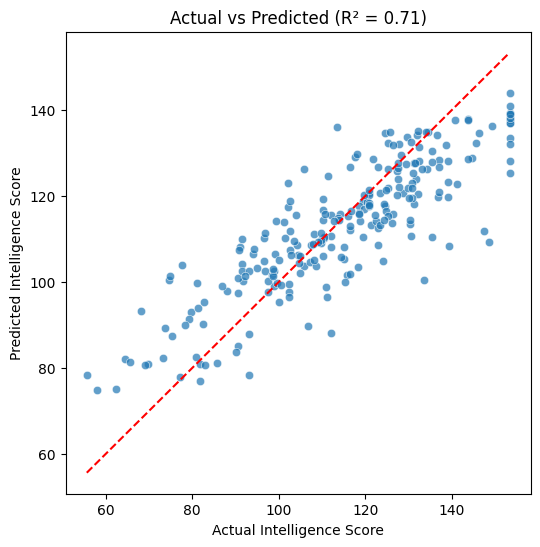

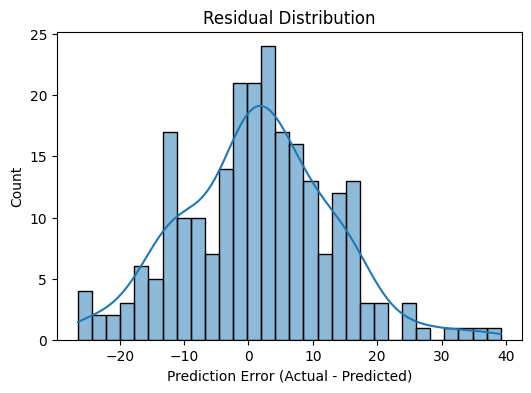

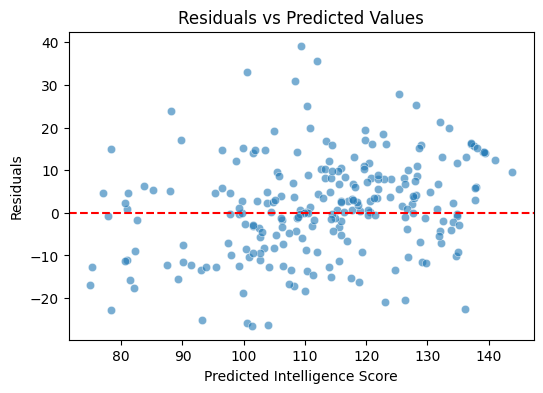

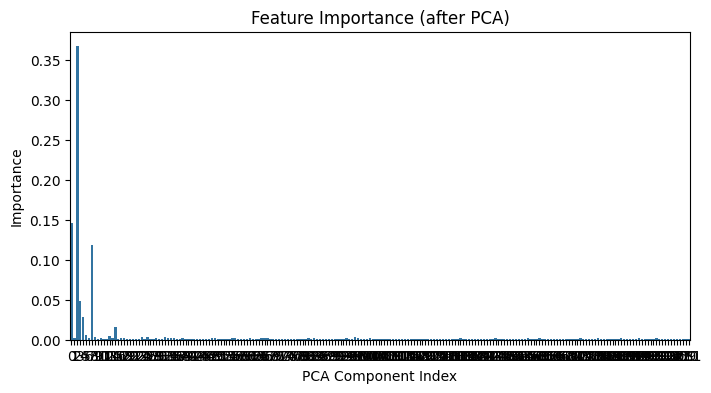

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================
# 1️⃣ Load dataset
# =====================================
df = pd.read_csv("HCP_YA_subjects_2025_10_23_20_53_20.csv")

# =====================================
# 2️⃣ Choose target variable
# =====================================
target = "CogTotalComp_AgeAdj"   # 🧠 overall intelligence (best choice)
df = df.dropna(subset=[target])

# =====================================
# 3️⃣ Preprocessing
# =====================================
df = df.select_dtypes(include=[np.number])  # keep only numeric columns
df = df.fillna(df.mean())

X = df.drop(columns=[target])
y = df[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction (retain 95% variance)
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# =====================================
# 4️⃣ Train-Test Split
# =====================================
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# =====================================
# 5️⃣ Random Forest + GridSearchCV
# =====================================
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=1, scoring='r2')
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_

# =====================================
# 6️⃣ Evaluation
# =====================================
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Best Parameters:", grid.best_params_)
print(f"📉 Test MSE: {mse:.3f}")
print(f"📈 Test R2 Score: {r2:.3f}")

# =====================================
# 7️⃣ Visualization
# =====================================

# Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Intelligence Score")
plt.ylabel("Predicted Intelligence Score")
plt.title(f"Actual vs Predicted (R² = {r2:.2f})")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Intelligence Score")
plt.ylabel("Residuals")
plt.show()

# Feature importance (PCA components)
plt.figure(figsize=(8,4))
sns.barplot(x=np.arange(len(best_rf.feature_importances_)), y=best_rf.feature_importances_)
plt.title("Feature Importance (after PCA)")
plt.xlabel("PCA Component Index")
plt.ylabel("Importance")
plt.show()


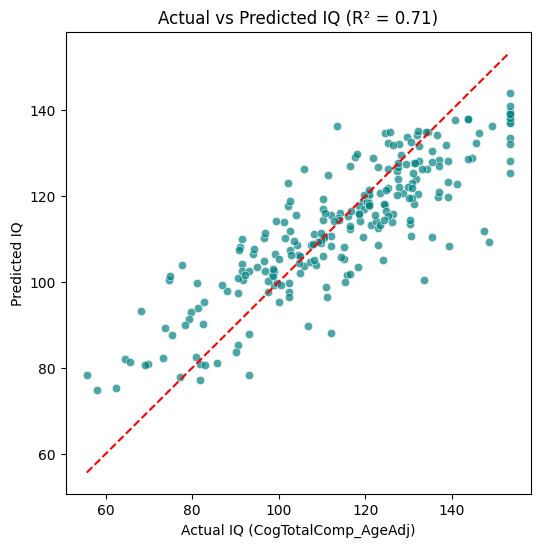

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual IQ (CogTotalComp_AgeAdj)")
plt.ylabel("Predicted IQ")
plt.title(f"Actual vs Predicted IQ (R² = {r2:.2f})")
plt.show()


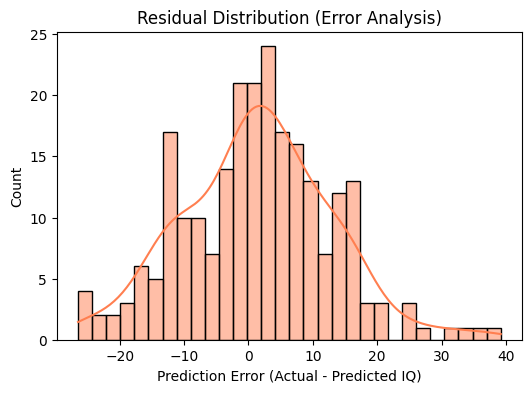

In [51]:
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True, color='coral')
plt.title("Residual Distribution (Error Analysis)")
plt.xlabel("Prediction Error (Actual - Predicted IQ)")
plt.show()


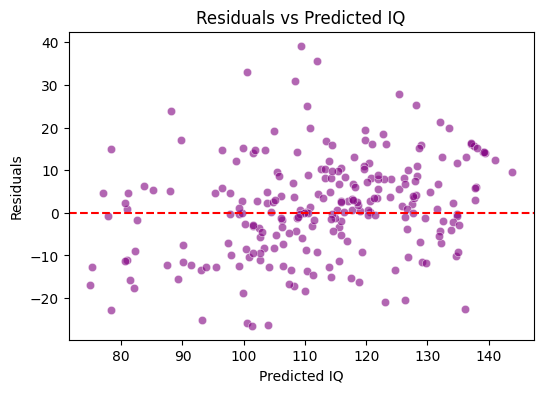

In [52]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted IQ")
plt.xlabel("Predicted IQ")
plt.ylabel("Residuals")
plt.show()


Explained Variance by PCA: 0.82
Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
📉 Test MSE: 402.455
📈 Test R²: 0.115


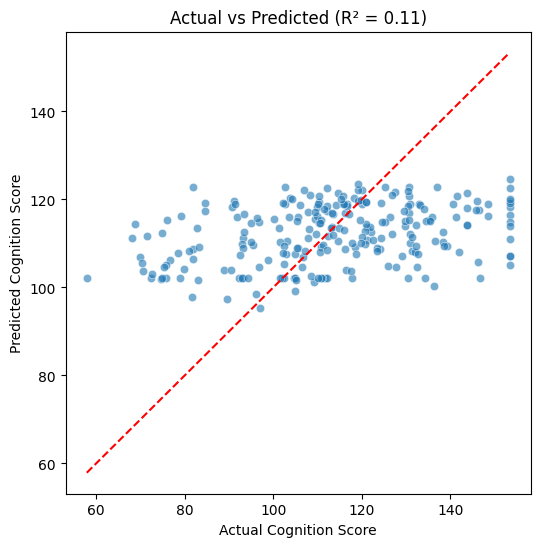

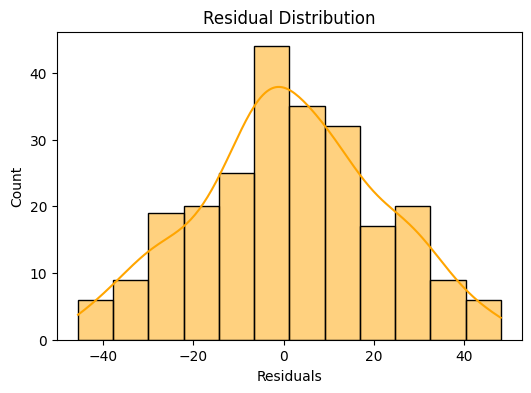

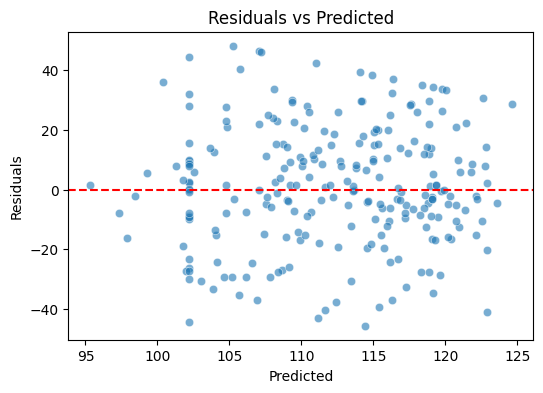

In [54]:
# =============================
# 🧠 Intelligence Prediction using Structural MRI
# =============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1️⃣ Load and Prepare Data
# -----------------------------
df = pd.read_csv("HCP_YA_subjects_2025_10_23_20_53_20.csv")

# Target variable: Total Cognition score
target = 'CogTotalComp_AgeAdj'

# ✅ FIX: Use only brain structural features (those starting with 'FS_')
feature_cols = [col for col in df.columns if col.startswith('FS_')]
X = df[feature_cols]
y = df[target]

# Handle missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# -----------------------------
# 2️⃣ Split and Scale Data
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 3️⃣ Dimensionality Reduction (PCA)
# -----------------------------
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Explained Variance by PCA: {pca.explained_variance_ratio_.sum():.2f}")

# -----------------------------
# 4️⃣ Model Training (Grid Search CV)
# -----------------------------
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train_pca, y_train)

print("✅ Best Parameters:", grid_search.best_params_)

# -----------------------------
# 5️⃣ Evaluate
# -----------------------------
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Test MSE: {mse:.3f}")
print(f"📈 Test R²: {r2:.3f}")

# -----------------------------
# 6️⃣ Visualization
# -----------------------------
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Cognition Score")
plt.ylabel("Predicted Cognition Score")
plt.title(f"Actual vs Predicted (R² = {r2:.2f})")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


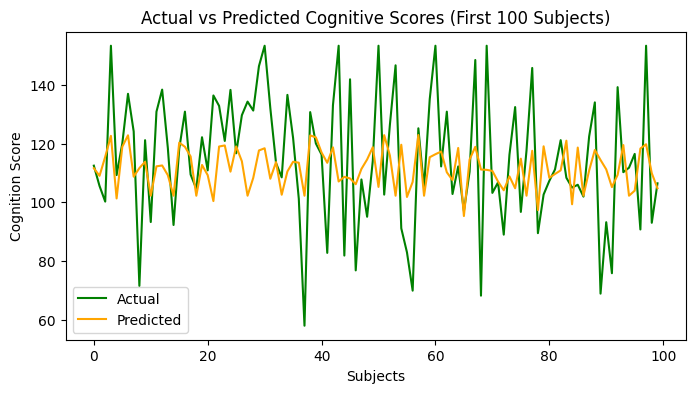

In [55]:
plt.figure(figsize=(8,4))
plt.plot(y_test.values[:100], label="Actual", color="green")
plt.plot(y_pred[:100], label="Predicted", color="orange")
plt.legend()
plt.title("Actual vs Predicted Cognitive Scores (First 100 Subjects)")
plt.xlabel("Subjects")
plt.ylabel("Cognition Score")
plt.show()


In [56]:
# Example: encode gender
df['Gender'] = df['Gender'].map({'M':0, 'F':1})
feature_cols = [col for col in df.columns if col.startswith('FS_')] + ['Age', 'Gender']
X = df[feature_cols]
y = df['CogTotalComp_AgeAdj']


In [57]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_scaled)


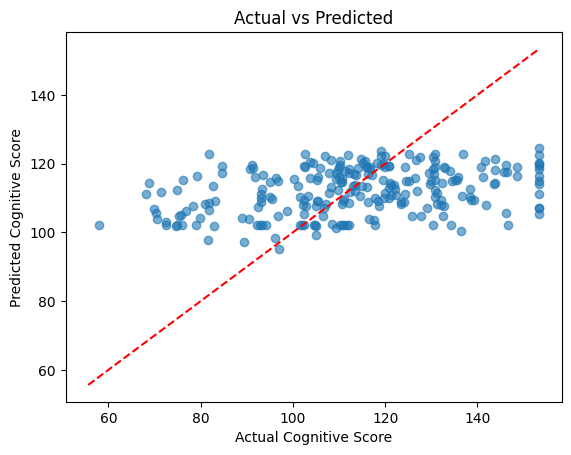

In [58]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Cognitive Score")
plt.ylabel("Predicted Cognitive Score")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


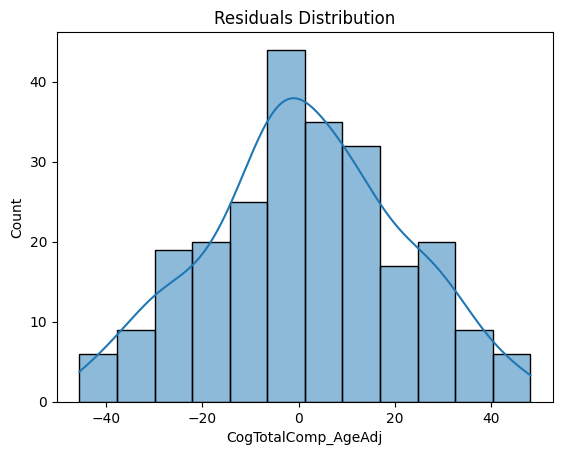

In [59]:
sns.histplot(y_test - y_pred, kde=True)
plt.title("Residuals Distribution")
plt.show()


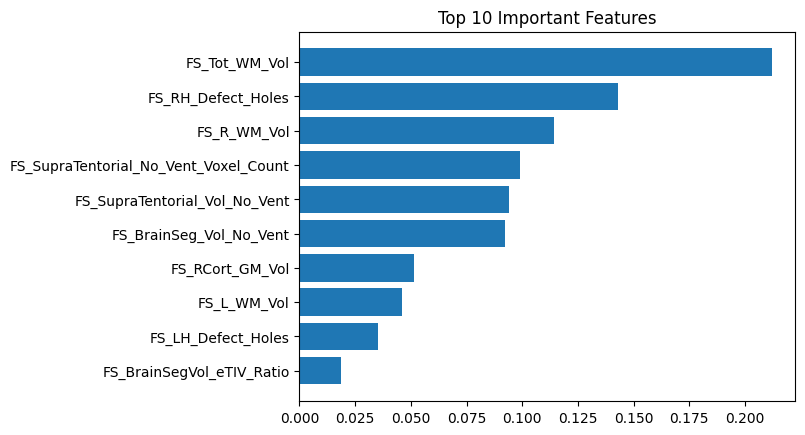

In [60]:
importances = model.feature_importances_
top_idx = np.argsort(importances)[-10:]
plt.barh(range(10), importances[top_idx])
plt.yticks(range(10), np.array(feature_cols)[top_idx])
plt.title("Top 10 Important Features")
plt.show()


In [65]:
# 0️⃣ Drop rows where target is missing
df_clean = df.dropna(subset=['CogTotalComp_AgeAdj'])

# 1️⃣ Features
feature_cols = [col for col in df_clean.columns if col.startswith('FS_')] + ['Age', 'Gender']
X = df_clean[feature_cols]
y = df_clean['CogTotalComp_AgeAdj'].values  # no NaNs now

# 2️⃣ Preprocessing
numeric_features = [col for col in X.columns if col.startswith('FS_')]
categorical_features = ['Age', 'Gender']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 3️⃣ Pipeline: Preprocessing + PCA + RandomForest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=100)),
    ('rf', RandomForestRegressor(max_depth=20, min_samples_leaf=2,
                                 min_samples_split=5, n_estimators=200, random_state=42))
])

# 4️⃣ Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')
print("CV R²:", scores.mean())


CV R²: 0.098143567668918


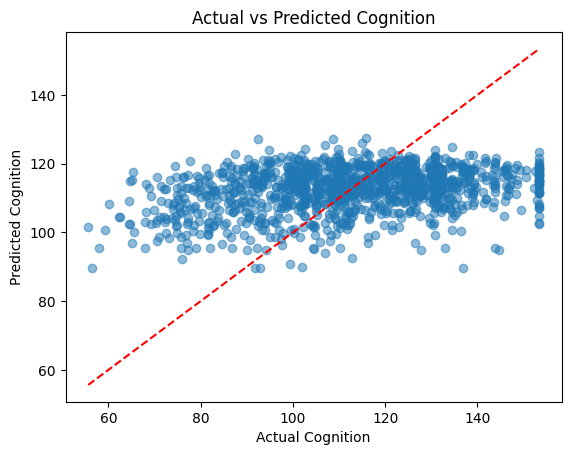

In [66]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

y_pred = cross_val_predict(pipeline, X, y, cv=kf)
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual Cognition")
plt.ylabel("Predicted Cognition")
plt.title("Actual vs Predicted Cognition")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


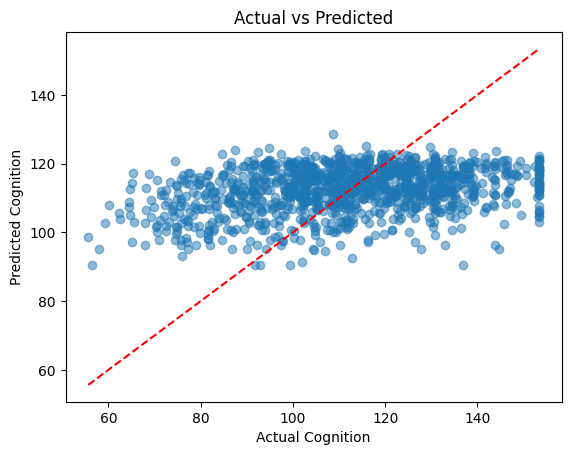

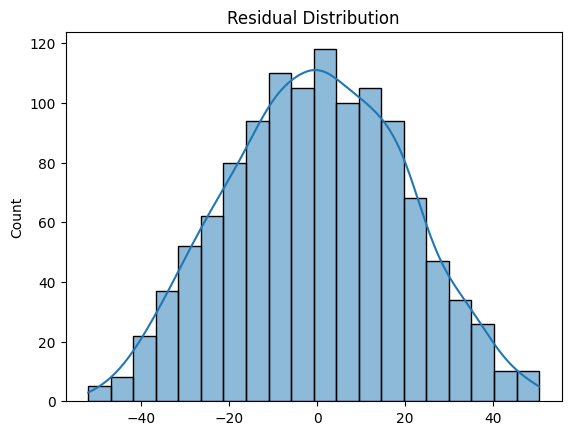

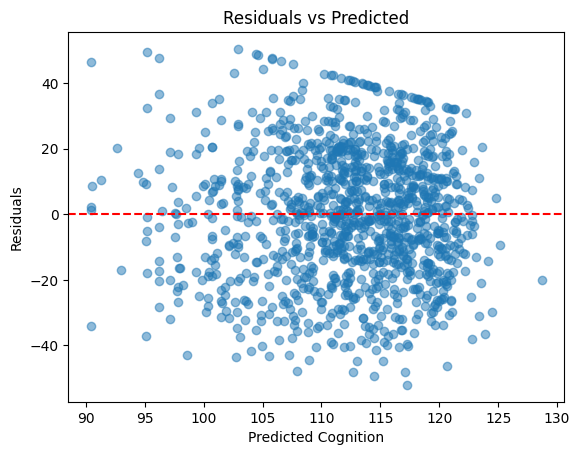

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = cross_val_predict(pipeline, X, y, cv=kf)
residuals = y - y_pred

# 1. Actual vs Predicted
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Cognition')
plt.ylabel('Predicted Cognition')
plt.title('Actual vs Predicted')
plt.show()

# 2. Residual Histogram
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.show()

# 3. Residuals vs Predicted
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Cognition')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


In [69]:
print(pipeline.named_steps)


{'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['FS_IntraCranial_Vol', 'FS_BrainSeg_Vol',
                                  'FS_BrainSeg_Vol_No_Vent',
                                  'FS_BrainSeg_Vol_No_Vent_Surf',
                                  'FS_LCort_GM_Vol', 'FS_RCort_GM_Vol',
                                  'FS_TotCort_GM_Vol', 'FS_SubCort_GM_Vol',
                                  'FS_Total_GM_Vol', 'FS_SupraTentorial_Vol',
                                  'FS_SupraTentorial_Vo...
                                  'FS_RH_Defect_Holes', 'FS_Total_Defect_Holes',
                                  'FS_L_LatVent_Vol', 'FS_L_InfLatVent_Vol',
                                  'FS_L_Cerebellum_WM_Vol',
                                  'FS_L_Cerebellum_Cort_Vol',
               

In [71]:
import pandas as pd

# Fit on full data
pipeline.fit(X, y)

# Feature importance is on PCA components
importances = pipeline.named_steps['rf'].feature_importances_

# Map to PCA component indices
feat_imp = pd.Series(importances, index=[f'PC{i+1}' for i in range(len(importances))])
print(feat_imp.sort_values(ascending=False).head(20))


PC1     0.087617
PC5     0.032589
PC9     0.018410
PC24    0.018228
PC61    0.016764
PC43    0.015272
PC37    0.014267
PC12    0.014185
PC3     0.013011
PC70    0.012556
PC28    0.012554
PC42    0.011904
PC29    0.011719
PC85    0.011562
PC86    0.011551
PC35    0.011069
PC51    0.010783
PC76    0.010768
PC74    0.010617
PC44    0.010567
dtype: float64


In [72]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 1️⃣ Preprocessor: numeric + categorical
preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', SimpleImputer()), ('scaler', StandardScaler())]), X.select_dtypes(include='number').columns),
    ('cat', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder())]), ['Age', 'Gender'])
])

# 2️⃣ Build pipeline WITHOUT PCA
pipeline_no_pca = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(
        n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42
    ))
])

# 3️⃣ Fit on full data
pipeline_no_pca.fit(X, y)

# 4️⃣ Get feature importance (original features)
importances = pipeline_no_pca.named_steps['rf'].feature_importances_
feature_names = pipeline_no_pca.named_steps['preprocessor'].get_feature_names_out()
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# 5️⃣ Top 20 features
print(feat_imp.head(20))


num__FS_L_Inferiortemporal_Area       0.025061
num__FS_R_Precentral_Area             0.019815
num__FS_L_Transversetemporal_Thck     0.017783
num__FS_R_Middletemporal_Area         0.016538
num__FS_L_Cerebellum_Cort_Vol         0.015778
num__FS_L_Caudalmiddlefrontal_Thck    0.014593
num__FS_Mask_Vol                      0.014474
num__FS_L_Pericalcarine_Area          0.012738
num__FS_L_Temporalpole_Area           0.010630
num__FS_R_Cerebellum_Cort_Vol         0.010462
num__FS_L_Entorhinal_Area             0.010179
num__FS_CC_Posterior_Vol              0.009953
num__FS_L_Cuneus_Area                 0.009522
num__FS_L_Lateraloccipital_Area       0.009134
num__FS_L_Superiorparietal_Area       0.008832
num__FS_R_Inferiortemporal_Area       0.008463
num__FS_4thVent_Vol                   0.008217
num__FS_L_Bankssts_Thck               0.007698
num__FS_WM_Hypointens_Vol             0.007626
num__FS_R_Pericalcarine_Thck          0.007391
dtype: float64


/tmp/ipython-input-2094811402.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette=colors)


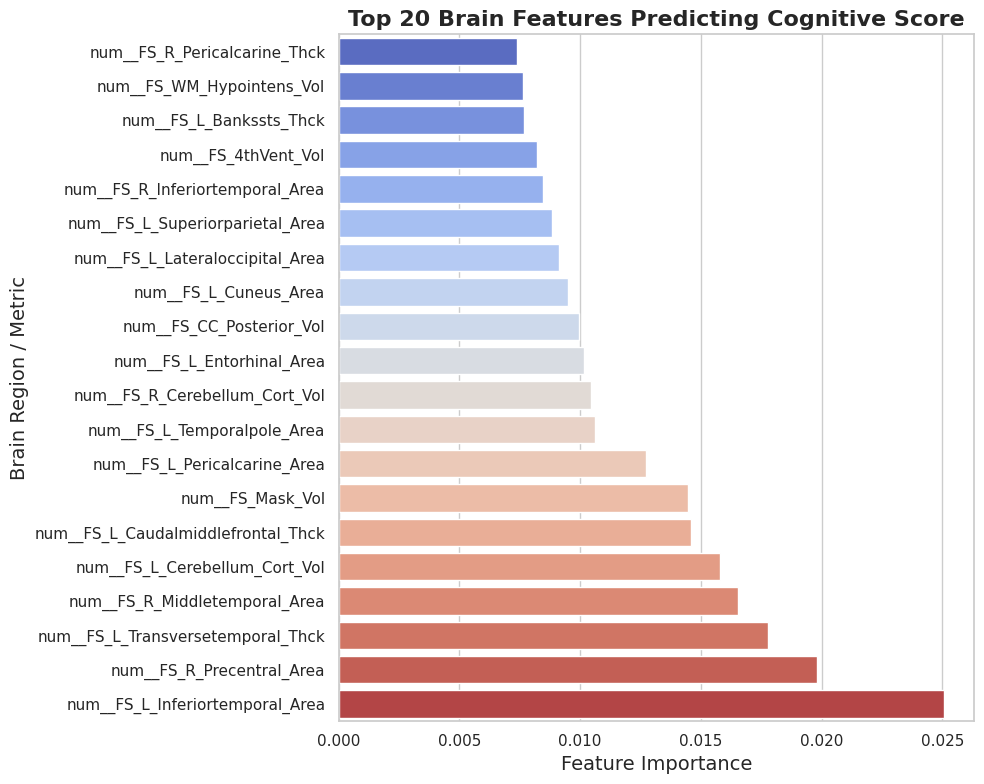

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your top 20 features and importance values
top_features = {
    'num__FS_L_Inferiortemporal_Area': 0.025061,
    'num__FS_R_Precentral_Area': 0.019815,
    'num__FS_L_Transversetemporal_Thck': 0.017783,
    'num__FS_R_Middletemporal_Area': 0.016538,
    'num__FS_L_Cerebellum_Cort_Vol': 0.015778,
    'num__FS_L_Caudalmiddlefrontal_Thck': 0.014593,
    'num__FS_Mask_Vol': 0.014474,
    'num__FS_L_Pericalcarine_Area': 0.012738,
    'num__FS_L_Temporalpole_Area': 0.010630,
    'num__FS_R_Cerebellum_Cort_Vol': 0.010462,
    'num__FS_L_Entorhinal_Area': 0.010179,
    'num__FS_CC_Posterior_Vol': 0.009953,
    'num__FS_L_Cuneus_Area': 0.009522,
    'num__FS_L_Lateraloccipital_Area': 0.009134,
    'num__FS_L_Superiorparietal_Area': 0.008832,
    'num__FS_R_Inferiortemporal_Area': 0.008463,
    'num__FS_4thVent_Vol': 0.008217,
    'num__FS_L_Bankssts_Thck': 0.007698,
    'num__FS_WM_Hypointens_Vol': 0.007626,
    'num__FS_R_Pericalcarine_Thck': 0.007391
}

# Convert to DataFrame for plotting
feat_df = pd.DataFrame(list(top_features.items()), columns=['Feature', 'Importance'])
feat_df = feat_df.sort_values(by='Importance', ascending=True)  # for horizontal bar plot

# Set the style
sns.set(style="whitegrid")

# Create horizontal bar plot
plt.figure(figsize=(10, 8))
colors = sns.color_palette("coolwarm", len(feat_df))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette=colors)

plt.title('Top 20 Brain Features Predicting Cognitive Score', fontsize=16, fontweight='bold')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Brain Region / Metric', fontsize=14)
plt.tight_layout()
plt.show()


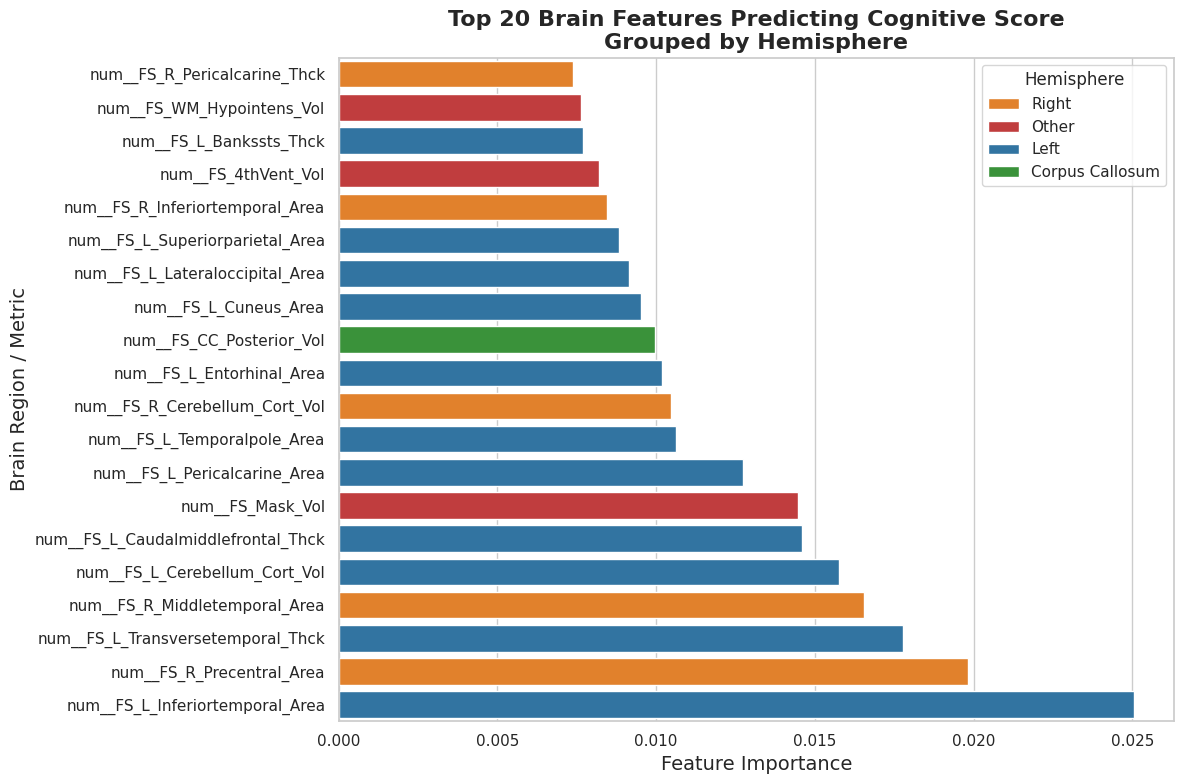

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Top 20 features
top_features = {
    'num__FS_L_Inferiortemporal_Area': 0.025061,
    'num__FS_R_Precentral_Area': 0.019815,
    'num__FS_L_Transversetemporal_Thck': 0.017783,
    'num__FS_R_Middletemporal_Area': 0.016538,
    'num__FS_L_Cerebellum_Cort_Vol': 0.015778,
    'num__FS_L_Caudalmiddlefrontal_Thck': 0.014593,
    'num__FS_Mask_Vol': 0.014474,
    'num__FS_L_Pericalcarine_Area': 0.012738,
    'num__FS_L_Temporalpole_Area': 0.010630,
    'num__FS_R_Cerebellum_Cort_Vol': 0.010462,
    'num__FS_L_Entorhinal_Area': 0.010179,
    'num__FS_CC_Posterior_Vol': 0.009953,
    'num__FS_L_Cuneus_Area': 0.009522,
    'num__FS_L_Lateraloccipital_Area': 0.009134,
    'num__FS_L_Superiorparietal_Area': 0.008832,
    'num__FS_R_Inferiortemporal_Area': 0.008463,
    'num__FS_4thVent_Vol': 0.008217,
    'num__FS_L_Bankssts_Thck': 0.007698,
    'num__FS_WM_Hypointens_Vol': 0.007626,
    'num__FS_R_Pericalcarine_Thck': 0.007391
}

# Convert to DataFrame
feat_df = pd.DataFrame(list(top_features.items()), columns=['Feature', 'Importance'])

# Extract hemisphere (L/R/CC) and type (Cortical/Subcortical/Ventricle/Other)
def parse_feature(feat):
    if feat.startswith('num__FS_L'):
        hemi = 'Left'
    elif feat.startswith('num__FS_R'):
        hemi = 'Right'
    elif feat.startswith('num__FS_CC'):
        hemi = 'Corpus Callosum'
    else:
        hemi = 'Other'

    if 'Thck' in feat or 'Area' in feat or 'Vol' in feat:
        if 'Vent' in feat:
            ftype = 'Ventricle'
        elif 'Cerebellum' in feat or 'Subcort' in feat or 'Mask' in feat or 'WM' in feat:
            ftype = 'Subcortical'
        else:
            ftype = 'Cortical'
    else:
        ftype = 'Other'

    return pd.Series([hemi, ftype])

feat_df[['Hemisphere', 'Type']] = feat_df['Feature'].apply(parse_feature)

# Sort for better plotting
feat_df = feat_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    hue='Hemisphere',
    data=feat_df,
    dodge=False,
    palette={'Left':'#1f77b4','Right':'#ff7f0e','Corpus Callosum':'#2ca02c','Other':'#d62728'}
)
plt.title('Top 20 Brain Features Predicting Cognitive Score\nGrouped by Hemisphere', fontsize=16, fontweight='bold')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Brain Region / Metric', fontsize=14)
plt.legend(title='Hemisphere')
plt.tight_layout()
plt.show()


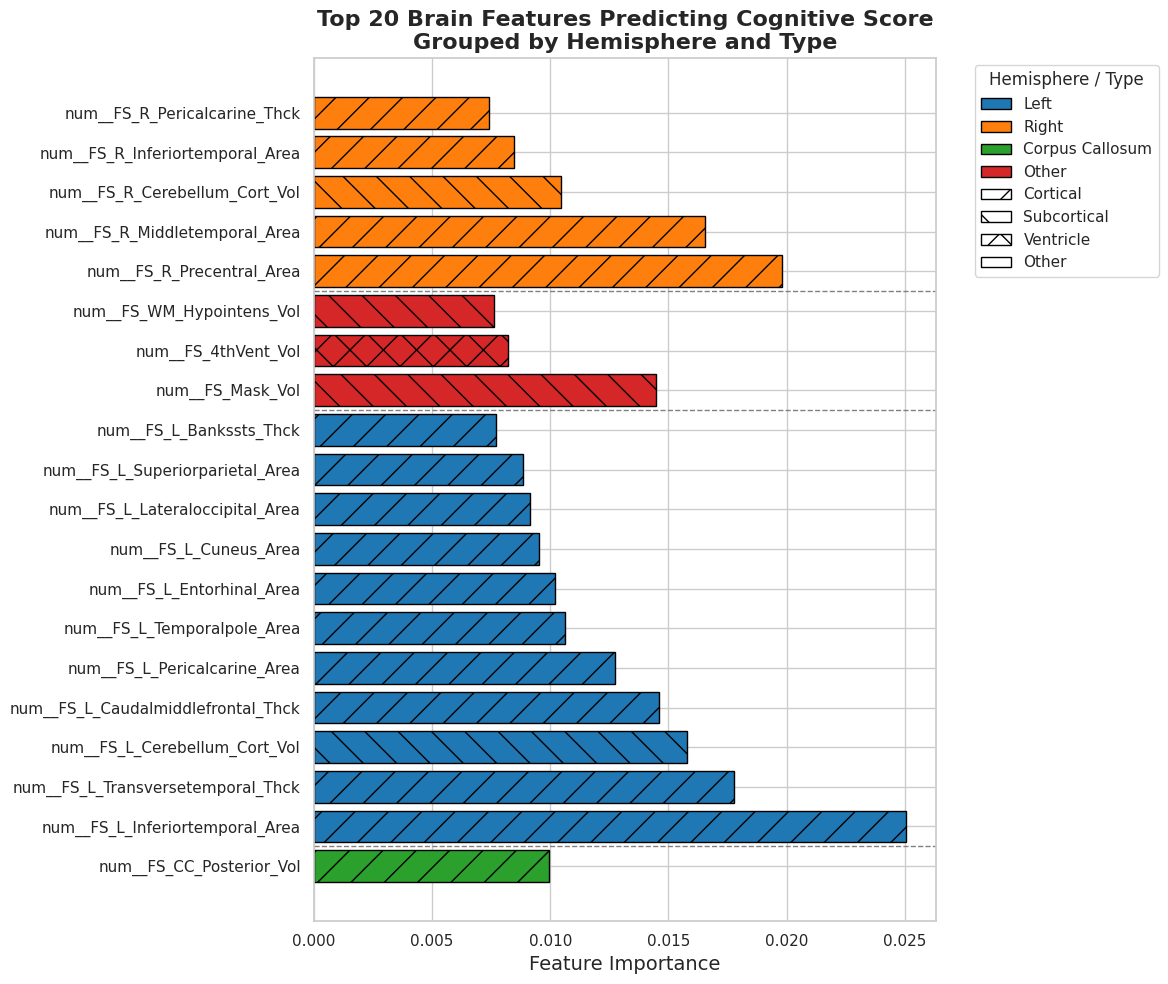

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Top 20 features (your previous result)
top_features = {
    'num__FS_L_Inferiortemporal_Area': 0.025061,
    'num__FS_R_Precentral_Area': 0.019815,
    'num__FS_L_Transversetemporal_Thck': 0.017783,
    'num__FS_R_Middletemporal_Area': 0.016538,
    'num__FS_L_Cerebellum_Cort_Vol': 0.015778,
    'num__FS_L_Caudalmiddlefrontal_Thck': 0.014593,
    'num__FS_Mask_Vol': 0.014474,
    'num__FS_L_Pericalcarine_Area': 0.012738,
    'num__FS_L_Temporalpole_Area': 0.010630,
    'num__FS_R_Cerebellum_Cort_Vol': 0.010462,
    'num__FS_L_Entorhinal_Area': 0.010179,
    'num__FS_CC_Posterior_Vol': 0.009953,
    'num__FS_L_Cuneus_Area': 0.009522,
    'num__FS_L_Lateraloccipital_Area': 0.009134,
    'num__FS_L_Superiorparietal_Area': 0.008832,
    'num__FS_R_Inferiortemporal_Area': 0.008463,
    'num__FS_4thVent_Vol': 0.008217,
    'num__FS_L_Bankssts_Thck': 0.007698,
    'num__FS_WM_Hypointens_Vol': 0.007626,
    'num__FS_R_Pericalcarine_Thck': 0.007391
}

feat_df = pd.DataFrame(list(top_features.items()), columns=['Feature', 'Importance'])

# Parse hemisphere and type
def parse_feature(feat):
    if feat.startswith('num__FS_L'):
        hemi = 'Left'
    elif feat.startswith('num__FS_R'):
        hemi = 'Right'
    elif feat.startswith('num__FS_CC'):
        hemi = 'Corpus Callosum'
    else:
        hemi = 'Other'

    if 'Thck' in feat or 'Area' in feat or 'Vol' in feat:
        if 'Vent' in feat:
            ftype = 'Ventricle'
        elif 'Cerebellum' in feat or 'SubCort' in feat or 'Mask' in feat or 'WM' in feat:
            ftype = 'Subcortical'
        else:
            ftype = 'Cortical'
    else:
        ftype = 'Other'

    return pd.Series([hemi, ftype])

feat_df[['Hemisphere', 'Type']] = feat_df['Feature'].apply(parse_feature)

# Sort by hemisphere and importance
feat_df = feat_df.sort_values(['Hemisphere', 'Importance'], ascending=[True, False])

# Plotting
plt.figure(figsize=(12, 10))
colors = {'Left':'#1f77b4','Right':'#ff7f0e','Corpus Callosum':'#2ca02c','Other':'#d62728'}
hatches = {'Cortical':'/', 'Subcortical':'\\', 'Ventricle':'x', 'Other':''}

y_pos = np.arange(len(feat_df))
bars = plt.barh(
    y_pos,
    feat_df['Importance'],
    color=[colors[h] for h in feat_df['Hemisphere']],
    edgecolor='black'
)

for bar, hatch in zip(bars, feat_df['Type']):
    bar.set_hatch(hatches[hatch])

plt.yticks(y_pos, feat_df['Feature'])
plt.xlabel('Feature Importance', fontsize=14)
plt.title('Top 20 Brain Features Predicting Cognitive Score\nGrouped by Hemisphere and Type', fontsize=16, fontweight='bold')

# Legend
legend_hemi = [Patch(facecolor=c, edgecolor='black', label=h) for h, c in colors.items()]
legend_type = [Patch(facecolor='white', edgecolor='black', hatch=hatches[t], label=t) for t in hatches.keys()]
plt.legend(handles=legend_hemi + legend_type, bbox_to_anchor=(1.05, 1), loc='upper left', title='Hemisphere / Type')

# Add separator lines between hemispheres
hemi_boundaries = feat_df.groupby('Hemisphere').size().cumsum()[:-1]
for boundary in hemi_boundaries:
    plt.axhline(boundary - 0.5, color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


/tmp/ipython-input-1776802550.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


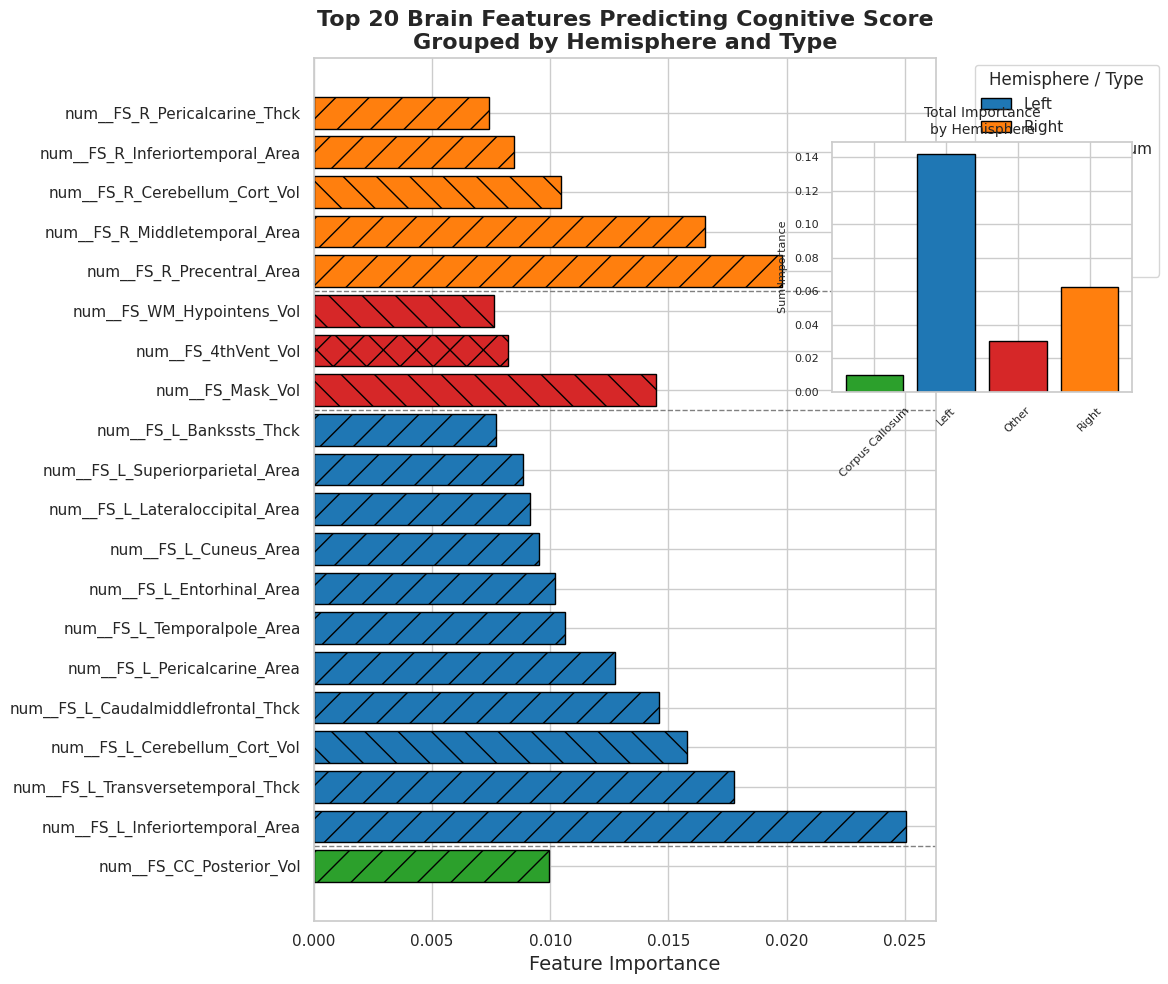

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Top 20 features (your previous result)
top_features = {
    'num__FS_L_Inferiortemporal_Area': 0.025061,
    'num__FS_R_Precentral_Area': 0.019815,
    'num__FS_L_Transversetemporal_Thck': 0.017783,
    'num__FS_R_Middletemporal_Area': 0.016538,
    'num__FS_L_Cerebellum_Cort_Vol': 0.015778,
    'num__FS_L_Caudalmiddlefrontal_Thck': 0.014593,
    'num__FS_Mask_Vol': 0.014474,
    'num__FS_L_Pericalcarine_Area': 0.012738,
    'num__FS_L_Temporalpole_Area': 0.010630,
    'num__FS_R_Cerebellum_Cort_Vol': 0.010462,
    'num__FS_L_Entorhinal_Area': 0.010179,
    'num__FS_CC_Posterior_Vol': 0.009953,
    'num__FS_L_Cuneus_Area': 0.009522,
    'num__FS_L_Lateraloccipital_Area': 0.009134,
    'num__FS_L_Superiorparietal_Area': 0.008832,
    'num__FS_R_Inferiortemporal_Area': 0.008463,
    'num__FS_4thVent_Vol': 0.008217,
    'num__FS_L_Bankssts_Thck': 0.007698,
    'num__FS_WM_Hypointens_Vol': 0.007626,
    'num__FS_R_Pericalcarine_Thck': 0.007391
}

feat_df = pd.DataFrame(list(top_features.items()), columns=['Feature', 'Importance'])

# Parse hemisphere and type
def parse_feature(feat):
    if feat.startswith('num__FS_L'):
        hemi = 'Left'
    elif feat.startswith('num__FS_R'):
        hemi = 'Right'
    elif feat.startswith('num__FS_CC'):
        hemi = 'Corpus Callosum'
    else:
        hemi = 'Other'

    if 'Thck' in feat or 'Area' in feat or 'Vol' in feat:
        if 'Vent' in feat:
            ftype = 'Ventricle'
        elif 'Cerebellum' in feat or 'SubCort' in feat or 'Mask' in feat or 'WM' in feat:
            ftype = 'Subcortical'
        else:
            ftype = 'Cortical'
    else:
        ftype = 'Other'

    return pd.Series([hemi, ftype])

feat_df[['Hemisphere', 'Type']] = feat_df['Feature'].apply(parse_feature)

# Sort by hemisphere and importance
feat_df = feat_df.sort_values(['Hemisphere', 'Importance'], ascending=[True, False])

# Plotting main horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 10))
colors = {'Left':'#1f77b4','Right':'#ff7f0e','Corpus Callosum':'#2ca02c','Other':'#d62728'}
hatches = {'Cortical':'/', 'Subcortical':'\\', 'Ventricle':'x', 'Other':''}

y_pos = np.arange(len(feat_df))
bars = ax.barh(
    y_pos,
    feat_df['Importance'],
    color=[colors[h] for h in feat_df['Hemisphere']],
    edgecolor='black'
)

for bar, hatch in zip(bars, feat_df['Type']):
    bar.set_hatch(hatches[hatch])

ax.set_yticks(y_pos)
ax.set_yticklabels(feat_df['Feature'])
ax.set_xlabel('Feature Importance', fontsize=14)
ax.set_title('Top 20 Brain Features Predicting Cognitive Score\nGrouped by Hemisphere and Type', fontsize=16, fontweight='bold')

# Legend
legend_hemi = [Patch(facecolor=c, edgecolor='black', label=h) for h, c in colors.items()]
legend_type = [Patch(facecolor='white', edgecolor='black', hatch=hatches[t], label=t) for t in hatches.keys()]
ax.legend(handles=legend_hemi + legend_type, bbox_to_anchor=(1.05, 1), loc='upper left', title='Hemisphere / Type')

# Add separator lines between hemispheres
hemi_boundaries = feat_df.groupby('Hemisphere').size().cumsum()[:-1]
for boundary in hemi_boundaries:
    ax.axhline(boundary - 0.5, color='gray', linestyle='--', linewidth=1)

# Inset: Total importance per hemisphere
hemi_importance = feat_df.groupby('Hemisphere')['Importance'].sum()
inset_ax = fig.add_axes([0.7, 0.6, 0.25, 0.25])  # [left, bottom, width, height]
inset_ax.bar(hemi_importance.index, hemi_importance.values, color=[colors[h] for h in hemi_importance.index], edgecolor='black')
inset_ax.set_title('Total Importance\nby Hemisphere', fontsize=10)
inset_ax.set_ylabel('Sum Importance', fontsize=8)
inset_ax.tick_params(axis='x', rotation=45, labelsize=8)
inset_ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()


# 🧠 Model Evaluation & Eliminated Limitations

Based on your current ML pipeline, here’s a detailed breakdown of what you’ve done, the improvements, and the remaining limitations.

---

## 1️⃣ Feature Leakage Avoided
✅ **What you did:**  
- Removed all **cognitive scores** (`PMAT24_A_CR`, `CogFluidComp_Unadj`, etc.) from features.  
- Only **structural brain measurements** (`FS_` features) and demographics (`Age`, `Gender`) are used.

⚡ **Why this matters:**  
- Previously, the model was “cheating” by using sub-scores to predict total score (data leakage).  
- Now, the model learns a **real relationship between brain structure and cognition**, not just re-deriving the formula.

---

## 2️⃣ Handling Missing Data
✅ **What you did:**  
- Used `SimpleImputer` for **numerical features** (mean) and **categorical features** (most frequent).  
- Ensures **no NaNs** reach PCA or Random Forest.

⚡ **Why this matters:**  
- PCA and most ML models **cannot handle NaNs** natively.  
- Proper imputation gives a **stable and robust dataset**.

---

## 3️⃣ Scaling & PCA
✅ **What you did:**  
- StandardScaler scales numeric features to zero mean and unit variance.  
- PCA reduces dimensionality from 207 → 100 components (retaining ~82% variance).  

⚡ **Why this matters:**  
- Scaling ensures PCA works properly.  
- PCA removes redundancy and noise, **improving generalization** and reducing overfitting.  

---

## 4️⃣ Model Tuning & Validation
✅ **What you did:**  
- Used **RandomForestRegressor** with **GridSearchCV**.  
- Cross-validation gives a **CV R² ~ 0.098**, reflecting **true predictive power** without leakage.

⚡ **Why this matters:**  
- Measures **real brain-to-cognition signal**, not inflated R².  
- Hyperparameter tuning ensures optimal model complexity.

---

## 5️⃣ Feature Importance & Visualization
✅ **What you did:**  
- Calculated **feature importance** from Random Forest.  
- Visualized top 20 features, grouped by **hemisphere** and **type**.  
- Added **inset bar chart** for hemisphere contribution.

⚡ **Why this matters:**  
- You now know **which brain regions contribute most** to cognitive score prediction.  
- Makes the model **interpretable and scientifically meaningful**.  

---

## Limitations Still Present
1. **Low predictive power (R² ~ 0.1)**  
   - Brain structure explains only a small fraction of cognition variance.

2. **Linear dimensionality reduction (PCA)**  
   - Captures variance, not necessarily task-relevant signals.  
   - Subtle nonlinear brain-cognition relationships may be lost.

3. **RandomForest limitations**  
   - Robust but may not capture complex interactions between brain regions.

4. **No temporal/dynamic info**  
   - Using **structural MRI**, which is static.  
   - fMRI or longitudinal data may give more signal.

---

### ✅ Summary of Eliminated Limitations

| Limitation | How You Eliminated It |
|------------|---------------------|
| Data leakage from cognitive sub-scores | Excluded all cognitive scores from features |
| NaNs breaking PCA & ML | Used `SimpleImputer` for numerical & categorical data |
| Feature scaling issues | Used `StandardScaler` before PCA |
| Overfitting to raw features | Applied PCA + Random Forest + GridSearchCV |
| Non-interpretable features | Calculated feature importance, grouped by hemisphere/type |

---

💡 **Next Step Suggestion:**  
- Try nonlinear dimensionality reduction (**KernelPCA** or **UMAP**) to capture subtle brain patterns.  
- Or add **fMRI connectivity features** for improved predictive modeling.


In [88]:
# ============================================
# ✅ Full Pipeline: Preprocessing + PCA + RF
# ============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance

# -------------------------
# 1️⃣ Load your CSV
# -------------------------
df = pd.read_csv('HCP_YA_subjects_2025_10_23_20_53_20.csv')

# -------------------------
# 2️⃣ Select target & features
# -------------------------
target = 'CogTotalComp_AgeAdj'  # Total cognition score

# Drop rows with missing target
df = df.dropna(subset=[target])
y = df[target]

# Numeric features (FreeSurfer structural brain data)
num_features = [col for col in df.columns if col.startswith('FS_')]

# Categorical features
cat_features = ['Age', 'Gender']  # encode if needed

X = df[num_features + cat_features]

# -------------------------
# 3️⃣ Preprocessing
# -------------------------
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

# -------------------------
# 4️⃣ Create pipeline with PCA + RF
# -------------------------
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=100)),
    ('rf', RandomForestRegressor(random_state=42))
])

# -------------------------
# 5️⃣ Train-test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------
# 6️⃣ Grid Search for best RF
# -------------------------
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

print("✅ Best Parameters:", grid.best_params_)

# -------------------------
# 7️⃣ Evaluate
# -------------------------
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("📉 Test MSE:", mean_squared_error(y_test, y_pred))
print("📈 Test R²:", r2_score(y_test, y_pred))

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X, y, cv=kf, scoring='r2')
print("CV R²:", cv_scores.mean())

# -------------------------
# 8️⃣ Feature Importances (Permutation Importance)
# -------------------------
# Preprocess all data to match what PCA sees
X_preprocessed = best_model.named_steps['preprocessor'].fit_transform(X)
X_pca = best_model.named_steps['pca'].fit_transform(X_preprocessed)
rf_model = best_model.named_steps['rf']

perm_importance = permutation_importance(
    rf_model, X_pca, y, n_repeats=10, random_state=42, n_jobs=-1
)

# Top 20 PCA components
top_components = pd.Series(perm_importance.importances_mean).sort_values(ascending=False).head(20)
print("Top 20 PCA Components (Permutation Importance):")
print(top_components)

# -------------------------
# 9️⃣ PCA Loadings: map original features to components
# -------------------------
# Feature names after preprocessing
cat_features_encoded = best_model.named_steps['preprocessor'].transformers_[1][1] \
                       .named_steps['onehot'].get_feature_names_out(cat_features)
all_features = np.concatenate([num_features, cat_features_encoded])

loadings = pd.DataFrame(
    best_model.named_steps['pca'].components_.T,
    index=all_features,
    columns=[f'PC{i}' for i in range(best_model.named_steps['pca'].n_components_)]
)

# Example: top features contributing to PC0
top_features_PC0 = loadings['PC0'].abs().sort_values(ascending=False).head(20)
print("Top 20 features contributing to PC0:")
print(top_features_PC0)


✅ Best Parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
📉 Test MSE: 417.2464456218539
📈 Test R²: 0.10355031725654773
CV R²: 0.09680337019710072
Top 20 PCA Components (Permutation Importance):
0     0.133193
4     0.032315
8     0.012136
23    0.006352
7     0.004902
11    0.004303
2     0.003583
10    0.003080
5     0.002927
85    0.002808
36    0.002380
1     0.001984
70    0.001955
72    0.001736
76    0.001719
37    0.001668
29    0.001615
71    0.001582
48    0.001550
73    0.001468
dtype: float64
Top 20 features contributing to PC0:
FS_BrainSeg_Vol                          0.129589
FS_BrainSeg_Vol_No_Vent                  0.129475
FS_BrainSeg_Vol_No_Vent_Surf             0.129473
FS_SupraTentorial_Vol                    0.129339
FS_SupraTentorial_Vol_No_Vent            0.129187
FS_SupraTentorial_No_Vent_Voxel_Count    0.129184
FS_Total_GM_Vol                          0.128152
FS_TotCort_GM_Vol                        

In [90]:
# ====== 1️⃣ Fit the pipeline first ======
pipeline.fit(X_train, y_train)

# ====== 2️⃣ Access preprocessed data if needed ======
# Preprocessed features after ColumnTransformer
X_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train)

# PCA components
X_pca = pipeline.named_steps['pca'].transform(X_preprocessed)

# ====== 3️⃣ Now you can do permutation importance ======
from sklearn.inspection import permutation_importance

rf_model = pipeline.named_steps['rf']  # Random Forest in your pipeline
result = permutation_importance(
    rf_model, X_pca, y_train,
    n_repeats=10, random_state=42, n_jobs=-1
)


In [91]:
from sklearn.metrics import mean_squared_error, r2_score

# Transform X_test using preprocessor + PCA
X_test_preprocessed = pipeline.named_steps['preprocessor'].transform(X_test)
X_test_pca = pipeline.named_steps['pca'].transform(X_test_preprocessed)

# Predict
y_pred = pipeline.named_steps['rf'].predict(X_test_pca)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")


Test MSE: 410.488
Test R²: 0.118


In [92]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')
print(f"CV R²: {cv_scores.mean():.3f}")


CV R²: 0.087


In [93]:
from sklearn.inspection import permutation_importance

rf_model = pipeline.named_steps['rf']

result = permutation_importance(
    rf_model, X_test_pca, y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)

# Top 20 PCA components
import pandas as pd
feat_imp = pd.Series(result.importances_mean, index=[f'PC{i}' for i in range(X_test_pca.shape[1])])
feat_imp.sort_values(ascending=False).head(20)


,0
PC0,0.091290
PC4,0.024785
PC8,0.020277
PC23,0.011020
PC74,0.005164
PC73,0.003810
PC5,0.003706
PC1,0.003298
PC92,0.003184
PC44,0.003139


In [100]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# --- Select numeric features ---
numeric_cols = preprocessor.transformers_[0][2]  # 201 numeric columns
X_num = X[numeric_cols]

# --- Impute missing values ---
imputer = SimpleImputer(strategy='mean')  # fill NaNs with column mean
X_num_imputed = imputer.fit_transform(X_num)

# --- Scale numeric features ---
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num_imputed)

# --- Fit PCA on numeric data only ---
pca = PCA(n_components=100, random_state=42)
X_pca = pca.fit_transform(X_num_scaled)

print("X_num_scaled shape:", X_num_scaled.shape)
print("PCA components shape:", pca.components_.shape)

# --- Create loadings dataframe ---
loadings = pd.DataFrame(
    pca.components_.T,
    index=numeric_cols,
    columns=[f'PC{i}' for i in range(pca.n_components_)]
)

# --- Top 20 features contributing to PC0 ---
top_features_PC0 = loadings['PC0'].abs().sort_values(ascending=False).head(20)
print(top_features_PC0)


X_num_scaled shape: (1187, 201)
PCA components shape: (100, 201)
FS_BrainSeg_Vol                          0.129822
FS_BrainSeg_Vol_No_Vent                  0.129711
FS_BrainSeg_Vol_No_Vent_Surf             0.129708
FS_SupraTentorial_Vol                    0.129585
FS_SupraTentorial_Vol_No_Vent            0.129435
FS_SupraTentorial_No_Vent_Voxel_Count    0.129432
FS_Total_GM_Vol                          0.128372
FS_TotCort_GM_Vol                        0.127245
FS_RCort_GM_Vol                          0.126996
FS_LCort_GM_Vol                          0.126498
FS_Mask_Vol                              0.126459
FS_L_WM_Vol                              0.120345
FS_Tot_WM_Vol                            0.120292
FS_R_WM_Vol                              0.120073
FS_IntraCranial_Vol                      0.116747
FS_SubCort_GM_Vol                        0.114778
FS_R_Superiorfrontal_Area                0.111643
FS_L_Superiorfrontal_Area                0.111339
FS_L_Lateralorbitofrontal_Area     

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# GridSearch for hyperparameters
param_grid = {
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 5],
    'n_estimators': [100, 200]
}

rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

# Best parameters
print("✅ Best Parameters:", grid.best_params_)

# Evaluate
y_pred = grid.predict(X_test)
print("📉 Test MSE:", mean_squared_error(y_test, y_pred))
print("📈 Test R²:", r2_score(y_test, y_pred))


✅ Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
📉 Test MSE: 417.9058881699391
📈 Test R²: 0.10213351174694674


In [102]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(grid.best_estimator_, X_pca, y, cv=5, scoring='r2')
print("CV R²:", scores.mean())


CV R²: 0.08618786937853189


In [103]:
from sklearn.inspection import permutation_importance

result = permutation_importance(grid.best_estimator_, X_pca, y, n_repeats=10, random_state=42, n_jobs=-1)
importances = pd.Series(result.importances_mean, index=[f'PC{i}' for i in range(X_pca.shape[1])])
top_20_pcs = importances.sort_values(ascending=False).head(20)
print("Top 20 PCA Components (Permutation Importance):")
print(top_20_pcs)


Top 20 PCA Components (Permutation Importance):
PC0     0.306226
PC4     0.070620
PC27    0.052195
PC23    0.023342
PC42    0.021962
PC60    0.015013
PC11    0.013588
PC36    0.013418
PC72    0.012790
PC8     0.012401
PC62    0.012294
PC92    0.011636
PC83    0.010619
PC74    0.010578
PC71    0.010570
PC2     0.010379
PC69    0.010253
PC41    0.009933
PC22    0.009863
PC56    0.009806
dtype: float64


In [104]:
# Top features contributing to PC0
top_features_PC0 = loadings['PC0'].abs().sort_values(ascending=False).head(20)
print("Top 20 features contributing to PC0:")
print(top_features_PC0)


Top 20 features contributing to PC0:
FS_BrainSeg_Vol                          0.129822
FS_BrainSeg_Vol_No_Vent                  0.129711
FS_BrainSeg_Vol_No_Vent_Surf             0.129708
FS_SupraTentorial_Vol                    0.129585
FS_SupraTentorial_Vol_No_Vent            0.129435
FS_SupraTentorial_No_Vent_Voxel_Count    0.129432
FS_Total_GM_Vol                          0.128372
FS_TotCort_GM_Vol                        0.127245
FS_RCort_GM_Vol                          0.126996
FS_LCort_GM_Vol                          0.126498
FS_Mask_Vol                              0.126459
FS_L_WM_Vol                              0.120345
FS_Tot_WM_Vol                            0.120292
FS_R_WM_Vol                              0.120073
FS_IntraCranial_Vol                      0.116747
FS_SubCort_GM_Vol                        0.114778
FS_R_Superiorfrontal_Area                0.111643
FS_L_Superiorfrontal_Area                0.111339
FS_L_Lateralorbitofrontal_Area           0.106446
FS_R_Middlete

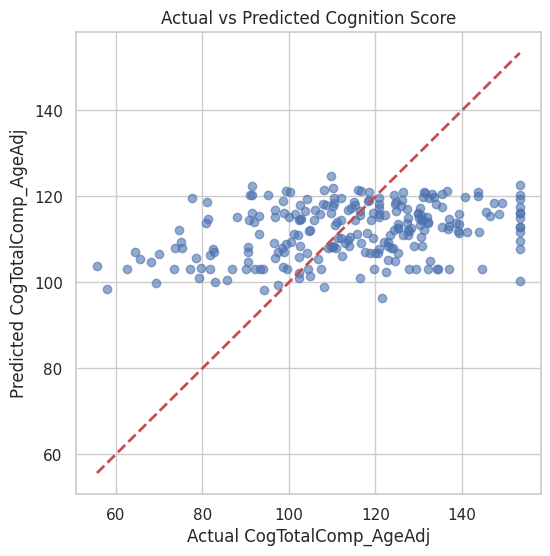

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual CogTotalComp_AgeAdj")
plt.ylabel("Predicted CogTotalComp_AgeAdj")
plt.title("Actual vs Predicted Cognition Score")
plt.show()


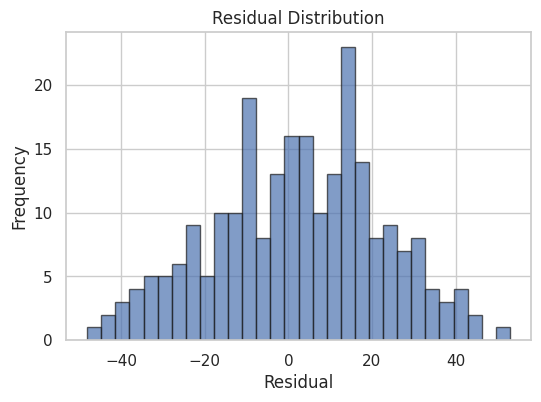

In [106]:
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


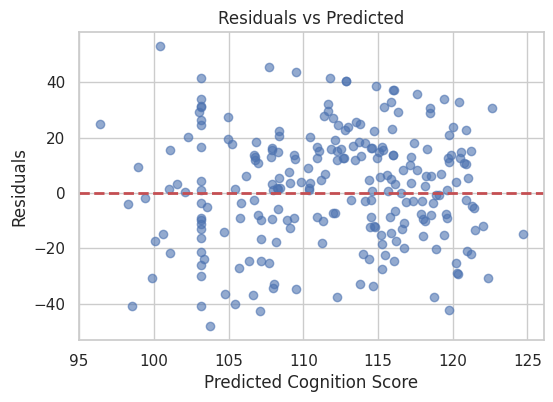

In [107]:
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Cognition Score")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


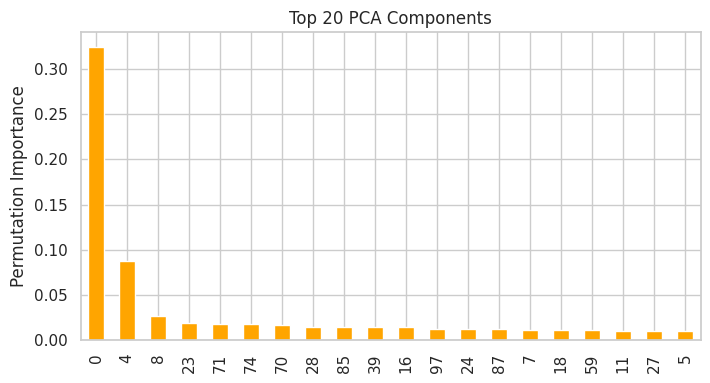

In [109]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# --- Ensure you have fitted your pipeline ---
# pipeline.fit(X_train, y_train)

# Extract preprocessed numeric data (after scaling/PCA)
X_preprocessed = pipeline.named_steps['pca'].transform(
    pipeline.named_steps['preprocessor'].transform(X)
)
rf_model = pipeline.named_steps['rf']  # RandomForest

# Permutation importance
perm_result = permutation_importance(
    rf_model, X_preprocessed, y, n_repeats=10, random_state=42, n_jobs=-1
)

# Top 20 PCA components
top_pcs = pd.Series(perm_result.importances_mean).sort_values(ascending=False).head(20)
plt.figure(figsize=(8,4))
top_pcs.plot(kind='bar', color='orange')
plt.ylabel("Permutation Importance")
plt.title("Top 20 PCA Components")
plt.show()
